In [5]:
%pip install --upgrade datasets ragas langchain-openai llama_index unstructured "unstructured[md]" libmagic  python-magic python-magic-bin  

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.



  Using cached tenacity-8.5.0-py3-none-any.whl.metadata (1.2 kB)
  Using cached pypdf-4.3.1-py3-none-any.whl.metadata (7.4 kB)
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------  1.6/1.6 MB 12.0 MB/s eta 0:00:01
   ---------------------------------------- 1.6/1.6 MB 9.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---------------------------------------- 1.2/1.2 MB 30.3 MB/s eta 0:00:00
Using cached pypdf-4.3.1-py3-none-any.whl (295 kB)
Using cached tenacity-8.5.0-py3-none-any.whl (28 kB)
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0
  Attempting uninstall: pypdf
    Found existing installation: pypdf 5.1.0
    Uninstalling pypdf-5.1.0:
      Successfully uninstalled pypdf-5.1.0


In [ ]:
import os
from dotenv import load_dotenv

load_dotenv()
OPENAI_DEPLOYMENT = 'gpt-4o'

In [ ]:
from datasets import load_dataset
from ragas import EvaluationDataset
from ragas.metrics import LLMContextRecall, Faithfulness, FactualCorrectness, SemanticSimilarity
from ragas import evaluate
from ragas.llms import LangchainLLMWrapper
from ragas.embeddings import LangchainEmbeddingsWrapper
from langchain_openai import AzureChatOpenAI, AzureOpenAI, AzureOpenAIEmbeddings

In [4]:
dataset = load_dataset("explodinggradients/amnesty_qa","english_v3", trust_remote_code=True)
eval_dataset = EvaluationDataset.from_hf_dataset(dataset["eval"])

Repo card metadata block was not found. Setting CardData to empty.


In [5]:
llm = AzureChatOpenAI(deployment_name=OPENAI_DEPLOYMENT)
embeddings_llm = AzureOpenAIEmbeddings(deployment="text-embedding-ada-002")
evaluator_llm = LangchainLLMWrapper(llm)
evaluator_embeddings = LangchainEmbeddingsWrapper(embeddings_llm)

# Run the LLM
llm.invoke("Tell me a joke")

AIMessage(content="Sure, here's a joke for you:\n\nWhy don’t scientists trust atoms?\n\nBecause they make up everything!", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 21, 'prompt_tokens': 11, 'total_tokens': 32, 'completion_tokens_details': None, 'prompt_tokens_details': None}, 'model_name': 'gpt-4o-2024-05-13', 'system_fingerprint': 'fp_67802d9a6d', 'prompt_filter_results': [{'prompt_index': 0, 'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'}, 'self_harm': {'filtered': False, 'severity': 'safe'}, 'sexual': {'filtered': False, 'severity': 'safe'}, 'violence': {'filtered': False, 'severity': 'safe'}}}], 'finish_reason': 'stop', 'logprobs': None, 'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'}, 'self_harm': {'filtered': False, 'severity': 'safe'}, 'sexual': {'filtered': False, 'severity': 'safe'}, 'violence': {'filtered': False, 'severity': 'safe'}}}, id='run-aca31073-8e64-4aa3-b7f4-dcf0

In [6]:
from ragas.metrics import context_precision, faithfulness, answer_relevancy, context_entity_recall

metrics = [
    context_precision, 
    faithfulness, 
    answer_relevancy, 
    context_entity_recall
    # LLMContextRecall(llm=evaluator_llm), 
    # FactualCorrectness(llm=evaluator_llm), 
    # Faithfulness(llm=evaluator_llm),
    # SemanticSimilarity(embeddings=evaluator_embeddings)
]
results = evaluate(dataset=eval_dataset, metrics=metrics, llm=llm, embeddings=embeddings_llm)

Evaluating:   0%|          | 0/80 [00:00<?, ?it/s]

In [7]:
df = results.to_pandas()
df

,user_input,retrieved_contexts,response,reference,context_precision,faithfulness,answer_relevancy,context_entity_recall
0,What are the global implications of the USA Su...,"[- In 2022, the USA Supreme Court handed down ...",The global implications of the USA Supreme Cou...,The global implications of the USA Supreme Cou...,1.000000,0.440000,0.999999,0.476190
1,Which companies are the main contributors to G...,"[In recent years, there has been increasing pr...","According to the Carbon Majors database, the m...","According to the Carbon Majors database, the m...",0.333333,0.120000,0.965234,0.647059
2,Which private companies in the Americas are th...,[The issue of greenhouse gas emissions has bec...,"According to the Carbon Majors database, the l...",The largest private companies in the Americas ...,0.333333,0.000000,0.991444,0.833333
3,What action did Amnesty International urge its...,"[In the case of the Ogoni 9, Amnesty Internati...",Amnesty International urged its supporters to ...,Amnesty International urged its supporters to ...,1.000000,0.600000,0.964429,1.000000
4,What are the recommendations made by Amnesty I...,"[In recent years, Amnesty International has fo...",Amnesty International made several recommendat...,The recommendations made by Amnesty Internatio...,0.500000,0.033333,0.989085,0.333333
5,Who are the target audience of the two books c...,"[In addition to children, parents, teachers, a...",The target audience of the two books created b...,The target audience of the two books created b...,0.583333,0.500000,0.999210,0.750000
6,Which right guarantees access to comprehensive...,[The right to truth is a fundamental human rig...,The right that guarantees access to comprehens...,The right that guarantees access to comprehens...,1.000000,1.000000,0.970043,0.000000
7,Who has the right to be fully informed about h...,"[In many cases, the identities of perpetrators...",Everyone has the right to be fully informed ab...,The victims of gross human rights violations a...,1.000000,0.295455,0.949050,1.000000
8,When can individuals be found guilty under Art...,[Article 207.3 of the Russian Criminal Code pe...,Under Article 207.3 of the Russian Criminal Co...,Individuals can be found guilty under Article ...,0.500000,0.000000,0.905143,1.000000
9,When does the prosecution consider statements ...,[- As long as their statements are contrary to...,Under Article 207.3 of the Russian Criminal Co...,The prosecution considers statements contrary ...,1.000000,0.000000,0.907557,1.000000


array([[<Axes: title={'center': 'context_precision'}>,
        <Axes: title={'center': 'faithfulness'}>],
       [<Axes: title={'center': 'answer_relevancy'}>,
        <Axes: title={'center': 'context_entity_recall'}>]], dtype=object)

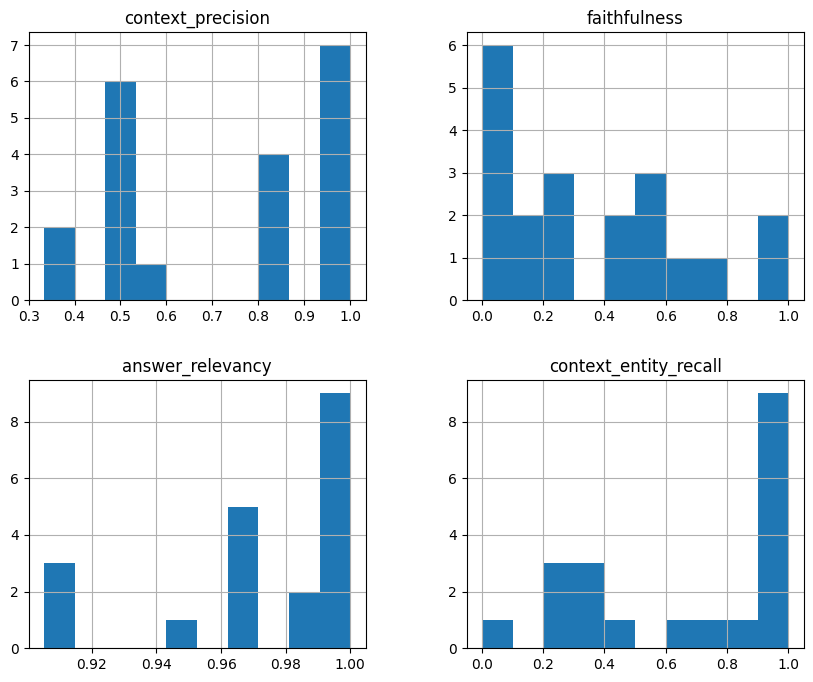

In [13]:
df.iloc[:, -4:].hist(bins=10, figsize=(10, 8))

In [ ]:
# Define the new inference data
new_inference = {
    'user_input': 'What is the capital of France?',
    'retrieved_contexts': ['Paris is the capital and most populous city of France.'],
    'response': 'The capital of France is Paris.',
    'reference': 'The capital of France is Paris.'
}

# Calculate context precision for the new inference
new_context_precision = context_precision.evaluate_single(
    user_input=new_inference['user_input'],
    retrieved_contexts=new_inference['retrieved_contexts'],
    response=new_inference['response'],
    reference=new_inference['reference']
)

print(f"Context Precision: {new_context_precision}")

Object `inference` not found.
